<a href="https://colab.research.google.com/github/ragi68/Music_Classification/blob/main/CS539_MusicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


audio_path = "/content/drive/Shared drives/CS539/Data/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)

# 2. Compute STFT
D = librosa.stft(y, n_fft=1024, hop_length=512)

# 3. Convert to decibels
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# 4. Plot spectrogram
plt.figure(figsize=(3, 3))
librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis=None, y_axis=None)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

In [5]:
DATASET_PATH = "/content/drive/Shared drives/CS539/Data/genres_original"
DESTINATION_PATH = "/content/drive/Shared drives/CS539/NewData/genres"

import os
import gc
genres = sorted(os.listdir(DATASET_PATH))
print(genres)
for genre in genres:
  if genre not in ['jazz', 'metal', 'pop', 'reggae', 'rock']:
    continue
  genre_path = os.path.join(DATASET_PATH, genre) #path to genres
  save_path = os.path.join(DESTINATION_PATH, genre) #path to save the spectogram
  os.makedirs(save_path, exist_ok=True)
  #loop through all files
  for filename in os.listdir(os.path.join(DATASET_PATH, genre)):
    try:
      if not filename.lower().endswith(".wav"):
          continue
      audio_path = os.path.join(genre_path, filename)
        # Load audio
      y, sr = librosa.load(audio_path, sr=None)
      D = librosa.stft(y, n_fft=1024, hop_length=512)
      S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
      fig = plt.figure(figsize=(3, 3), dpi=100)
      librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis=None, y_axis=None)
      out_file = os.path.join(save_path, filename.replace(".wav", ".png"))
      fig.savefig(out_file, bbox_inches='tight', pad_inches=0)
      plt.close(fig)
      print(f"Saved: {out_file}")

      del y
      del D
      del S_db
      gc.collect()
    except Exception as e:
      gc.collect()
      continue


['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00008.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00005.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00006.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00002.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00001.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00000.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00003.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00004.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00007.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00015.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00011.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/j

/tmp/ipython-input-1527334114.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00052.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00049.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00056.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00048.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00055.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00047.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00057.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00051.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00058.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00053.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00073.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00061.png
Saved: /content/drive/Shared drives/CS539/NewData/genres/jazz/jazz.00071.png

In [6]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpectrogramCNN(nn.Module):
  def __init__(self, num_classes, target_size=(128, 256)):
    super().__init__()

    self.conv1 = nn.Sequential(
      nn.Conv2d(1, 32, 3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(),
      nn.MaxPool2d(2),
    )
    self.conv2 = nn.Sequential(
      nn.Conv2d(32, 64, 3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
      nn.Conv2d(64, 128, 3, padding=1),
      nn.BatchNorm2d(128),
      nn.ReLU(),
      nn.MaxPool2d(2),
    )
    self.conv4 = nn.Sequential(
      nn.Conv2d(128, 256, 3, padding=1),
      nn.BatchNorm2d(256),
      nn.ReLU(),
      nn.AdaptiveAvgPool2d((1, 1))
    )
    self.fc = nn.Sequential(
        nn.Linear(256, num_classes))

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.view(x.size(0), -1)
    return self.fc(x)



In [7]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((128, 256)),
    transforms.RandomHorizontalFlip(p=0.5),  # Time reversal
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),
    # Add random erasing for robustness
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.2))
])

class ImageDataSet(Dataset):
  def __init__(self, root_dir, transform=None):
    self.root_dir = root_dir
    self.transform = transform

    self.samples = []
    self.classes = sorted(os.listdir(root_dir))
    self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

    for cls in self.classes:
      class_path = os.path.join(root_dir, cls)
      for fname in os.listdir(class_path):
        if fname.lower().endswith(".png"):
          self.samples.append((os.path.join(class_path, fname), self.class_to_idx[cls]))

  def __len__(self):
    return len(self.samples)

  def __getitem__(self, idx):
    img_path, label = self.samples[idx]
    img = Image.open(img_path).convert("L")

    if self.transform:
      img = self.transform(img)

    return img, label


In [8]:
from sklearn.model_selection import train_test_split
import torch

DATASET_IMG_PATH = "/content/drive/Shared drives/CS539/NewData/genres"

dataset = ImageDataSet(DATASET_IMG_PATH, transform=transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, temp_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size + test_size],
    generator=torch.Generator().manual_seed(42)
)
val_dataset, test_dataset = torch.utils.data.random_split(
    temp_dataset, [val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)


num_classes = len(dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpectrogramCNN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5)

EPOCHS = 100
best_val_acc = 0.0

for epoch in range(EPOCHS):
    # Training
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (preds == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    avg_loss = running_loss / len(train_loader)

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {avg_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Learning rate scheduling
    scheduler.step(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"New best model saved! Val Acc: {val_acc:.2f}%")

# Load best model for testing
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Epoch 1/100, Loss: 1.8764, Val Acc: 18.79%
New best model saved! Val Acc: 18.79%
Epoch 2/100, Loss: 1.6066, Val Acc: 22.15%
New best model saved! Val Acc: 22.15%
Epoch 3/100, Loss: 1.4608, Val Acc: 42.28%
New best model saved! Val Acc: 42.28%
Epoch 4/100, Loss: 1.3760, Val Acc: 53.02%
New best model saved! Val Acc: 53.02%
Epoch 5/100, Loss: 1.2634, Val Acc: 38.93%
Epoch 6/100, Loss: 1.1989, Val Acc: 43.62%
Epoch 7/100, Loss: 1.0973, Val Acc: 48.32%
Epoch 8/100, Loss: 1.0593, Val Acc: 44.97%
Epoch 9/100, Loss: 1.0028, Val Acc: 35.57%
Epoch 10/100, Loss: 0.9385, Val Acc: 53.02%
Epoch 11/100, Loss: 0.8896, Val Acc: 63.09%
New best model saved! Val Acc: 63.09%
Epoch 12/100, Loss: 0.8593, Val Acc: 53.02%
Epoch 13/100, Loss: 0.8039, Val Acc: 57.72%
Epoch 14/100, Loss: 0.7861, Val Acc: 56.38%
Epoch 15/100, Loss: 0.7794, Val Acc: 63.09%
Epoch 16/100, Loss: 0.7425, Val Acc: 57.05%
Epoch 17/100, Loss: 0.7312, Val Acc: 65.77%
New best model saved! Val Acc: 65.77%
Epoch 18/100, Loss: 0.6961, Val A

/tmp/ipython-input-3720890015.py:70: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  mel_image = Image.fromarray(mel_spec_np, mode='L')


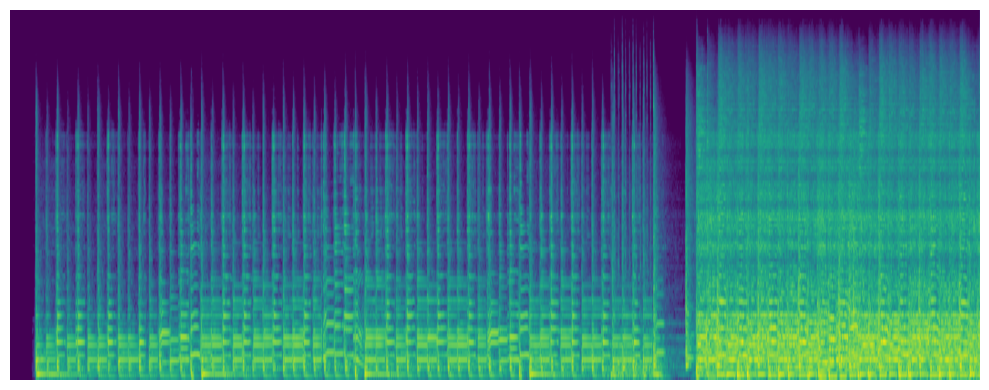


Predicted Genre: rock
Confidence: 65.75%

All probabilities:
  rock        : 65.75%
  blues       : 26.01%
  disco       : 4.44%
  hiphop      : 2.91%
  pop         : 0.22%
  metal       : 0.19%
  reggae      : 0.19%
  country     : 0.13%
  classical   : 0.09%
  jazz        : 0.07%


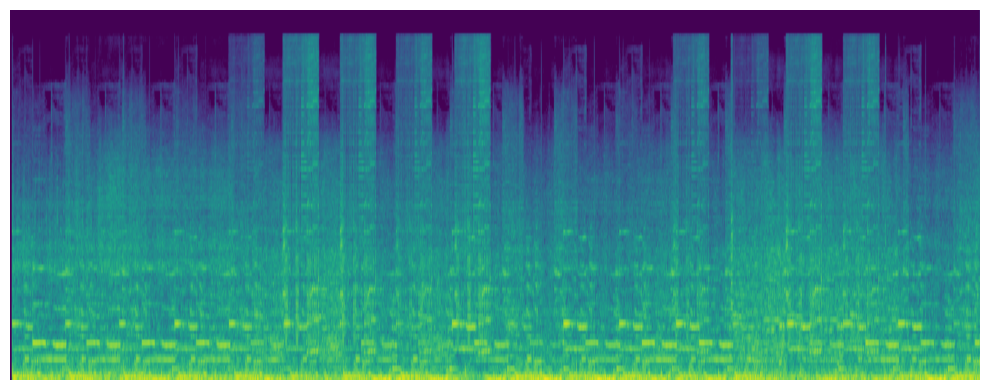


Predicted Genre: hiphop
Confidence: 49.20%

All probabilities:
  hiphop      : 49.20%
  pop         : 28.28%
  disco       : 14.88%
  rock        : 5.68%
  metal       : 1.58%
  reggae      : 0.15%
  blues       : 0.14%
  country     : 0.04%
  classical   : 0.03%
  jazz        : 0.01%


In [14]:
import torch
import torchaudio
import torchaudio.transforms as T
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class AudioPredictor:
    def __init__(self, model_path, class_names, device=None):
        """
        Initialize the predictor with a trained model.

        Args:
            model_path: Path to saved model weights
            class_names: List of class names (genres)
            device: torch device (cuda/cpu)
        """
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.class_names = class_names

        # Load model
        self.model = SpectrogramCNN(num_classes=len(class_names))
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.to(self.device)
        self.model.eval()

        # Image preprocessing (same as training)
        self.transform = transforms.Compose([
            transforms.Resize((128, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

    def wav_to_mel_spectrogram(self, wav_path, n_mels=128, n_fft=2048, hop_length=512):
        """
        Convert WAV file to mel spectrogram using librosa.

        Args:
            wav_path: Path to WAV file
            n_mels: Number of mel bands
            n_fft: FFT window size
            hop_length: Hop length for STFT

        Returns:
            PIL Image of mel spectrogram
        """
        # Load audio with librosa
        waveform, sample_rate = librosa.load(wav_path, sr=None, mono=True)

        # Generate mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=waveform,
            sr=sample_rate,
            n_fft=n_fft,
            hop_length=hop_length,
            n_mels=n_mels,
            power=2.0
        )

        # Convert to dB scale
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

        # Normalize to 0-255 range for image
        mel_spec_np = mel_spec_db.copy()
        mel_spec_np = (mel_spec_np - mel_spec_np.min()) / (mel_spec_np.max() - mel_spec_np.min())
        mel_spec_np = (mel_spec_np * 255).astype(np.uint8)

        # Convert to PIL Image (grayscale)
        mel_image = Image.fromarray(mel_spec_np, mode='L')

        return mel_image, mel_spec_np

    def predict(self, wav_path, return_probs=False, visualize=False):
        """
        Predict the class of an audio file.

        Args:
            wav_path: Path to WAV file
            return_probs: If True, return probabilities for all classes
            visualize: If True, display the mel spectrogram

        Returns:
            Predicted class name and optionally probabilities
        """
        # Generate mel spectrogram
        mel_image, mel_array = self.wav_to_mel_spectrogram(wav_path)

        # Visualize if requested
        if visualize:
            plt.figure(figsize=(10, 4))
            plt.imshow(mel_array, aspect='auto', origin='lower', cmap='viridis')
            plt.axis('off')
            plt.tight_layout()
            plt.show()

        # Preprocess image
        input_tensor = self.transform(mel_image).unsqueeze(0)  # Add batch dimension
        input_tensor = input_tensor.to(self.device)

        # Make prediction
        with torch.no_grad():
            outputs = self.model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            confidence, predicted_idx = torch.max(probabilities, 1)

        predicted_class = self.class_names[predicted_idx.item()]
        confidence_score = confidence.item()

        if return_probs:
            probs_dict = {
                self.class_names[i]: probabilities[0][i].item()
                for i in range(len(self.class_names))
            }
            return predicted_class, confidence_score, probs_dict

        return predicted_class, confidence_score


# Example usage:
if __name__ == "__main__":
    # Define your class names (same order as training)
    class_names = ['blues', 'classical', 'country', 'disco', 'hiphop',
                   'jazz', 'metal', 'pop', 'reggae', 'rock']

    # Initialize predictor
    predictor = AudioPredictor(
        model_path='best_model.pth',
        class_names=class_names
    )

    # Predict on a single WAV file
    wav_file = '/content/drive/Shared drives/CS539/Test_Rock.wav'
    wav_file_2 = '/content/drive/Shared drives/CS539/Test_Hiphop.wav'

    # Get all probabilities
    predicted_genre, confidence, all_probs = predictor.predict(
        wav_file,
        return_probs=True,
        visualize=True
    )
    print(f"\nPredicted Genre: {predicted_genre}")
    print(f"Confidence: {confidence:.2%}")
    print("\nAll probabilities:")
    for genre, prob in sorted(all_probs.items(), key=lambda x: x[1], reverse=True):
        print(f"  {genre:12s}: {prob:.2%}")
    predicted_genre, confidence, all_probs = predictor.predict(
        wav_file_2,
        return_probs=True,
        visualize=True
    )

    print(f"\nPredicted Genre: {predicted_genre}")
    print(f"Confidence: {confidence:.2%}")
    print("\nAll probabilities:")
    for genre, prob in sorted(all_probs.items(), key=lambda x: x[1], reverse=True):
        print(f"  {genre:12s}: {prob:.2%}")